In [18]:
import numpy as np
import matplotlib.pyplot as plt

1) Como vimos em aula, é possível usar Poisson para modelar uma pesca. Suponha que um
pescador pesca por 10 horas com taxa de chegada de peixes λ = 1/h. Agora, suponha também
que, após cada peixe pescado, o pescador interrompe a pesca e gasta meia hora limpando o
peixe antes de retomar a pescaria. a) Plote um exemplo dessa pesca. b) Usando Monte Carlo,
gere um gráfico da probabilidade de cada quantidade de peixes pescados (isto é, um gráfico de
Nº de Peixes X Probabilidade, que mostre qual a probabilidade de a pescaria resultar em 0, 1,
2, 3,... peixes). c) Analisando os resultados anteriores, essa pescaria continua sendo bem
modelada como um processo de Poisson? Justifique.

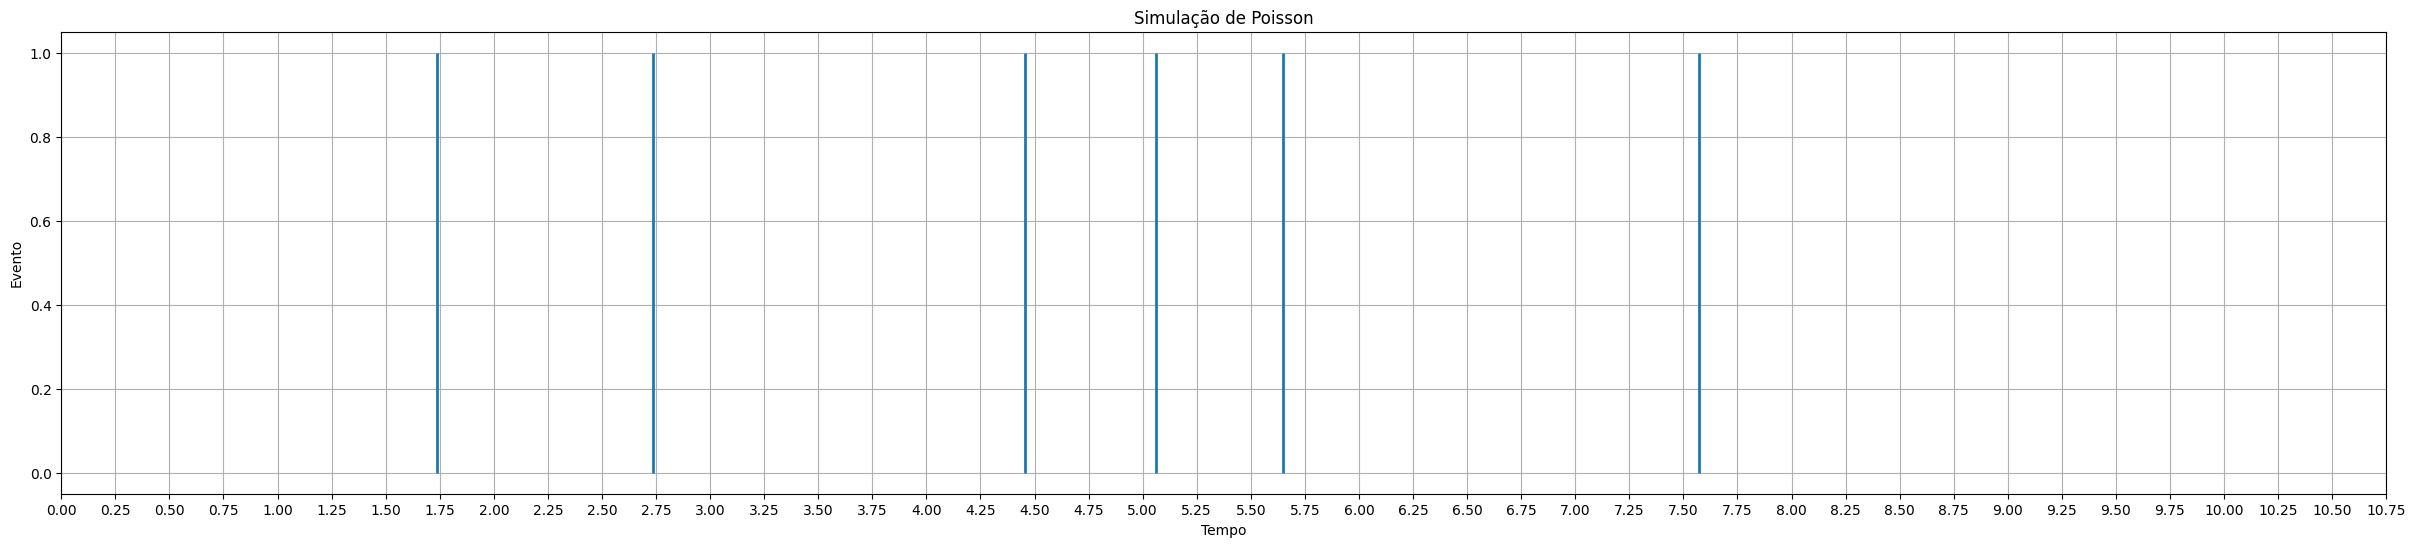

In [205]:
#A)
# Lambda (taxa de chegada)
lamb = 1

# Seta intervalo de tempo
t_inicial = 0
t_final = 10

# Calcula esperança de numero de eventos no intervalo
eventos_esperados = lamb * (t_final - t_inicial)

# Gera numero de eventos de Poisson
eventos = np.random.poisson(eventos_esperados)

# Gera tempos para o numero de eventos acima
tempo_eventos = np.sort(np.random.uniform(t_inicial, t_final, size=eventos))

eventos_mod = 1
tempo_eventos_mod = [tempo_eventos[0]]
for i in range(1,len(tempo_eventos)-1):
    dif = tempo_eventos[i]-tempo_eventos_mod[-1]
    if dif>0.5:
        tempo_eventos_mod.append(tempo_eventos[i])
        eventos_mod+=1
plt.figure(figsize=(t_final*3, 6))
plt.vlines(tempo_eventos_mod, 0, 1, linewidth=2)
plt.xlim(t_inicial, t_final)
plt.xticks(np.arange(t_inicial,t_final+1,0.25))
plt.xlabel('Tempo')
plt.ylabel('Evento')
plt.title('Simulação de Poisson')
plt.grid()
plt.show()

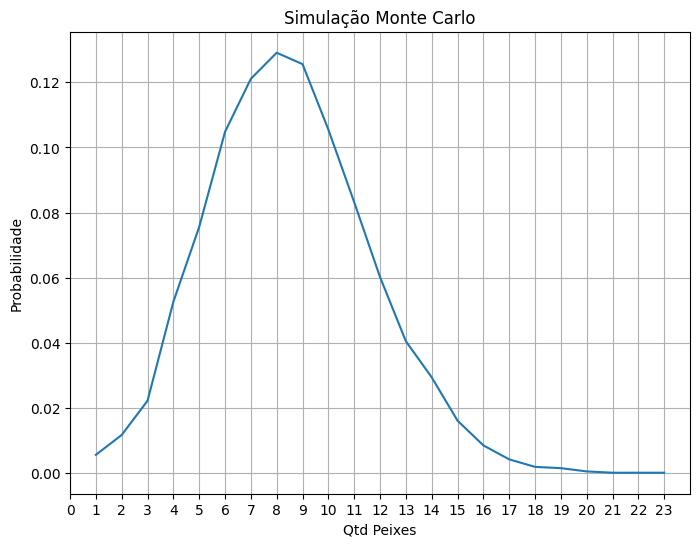

In [169]:
#B)
# Lambda (taxa de chegada)
lamb = 1

# Seta intervalo de tempo
t_inicial = 0
t_final = 10

sims = 10000
qtd_pescada = []
for i in range(sims):
    # Calcula esperança de numero de eventos no intervalo
    eventos_esperados = lamb * (t_final - t_inicial)

    # Gera numero de eventos de Poisson
    eventos = np.random.poisson(eventos_esperados)
    if eventos==0:
        eventos = 1

    # Gera tempos para o numero de eventos acima
    tempo_eventos = np.sort(np.random.uniform(t_inicial, t_final, size=eventos))

    eventos_mod = 1
    tempo_eventos_mod = [tempo_eventos[0]]
    for i in range(1,len(tempo_eventos)-1):
        dif = tempo_eventos[i]-tempo_eventos_mod[-1]
        if dif>0.5:
            eventos_mod+=1
    qtd_pescada.append(eventos_mod)

probs = {}
for i in np.unique(qtd_pescada):
    probs[i] = qtd_pescada.count(i)/sims

plt.figure(figsize=(8, 6))
plt.plot(probs.keys(), probs.values())
plt.xlim(0, max(qtd_pescada)+1)
plt.xticks(np.arange(0,max(qtd_pescada)+1))
plt.xlabel('Qtd Peixes')
plt.ylabel('Probabilidade')
plt.title('Simulação Monte Carlo')
plt.grid()
    

2) Considere o exercício das 2 máquinas (exercício 4, slides de aula de cadeia de Markov Contínua).
Simule e plote os resultados do tempo que as máquinas passam em cada estado para vários pares
de valores de (λ, μ). Analise e comente os resultados.

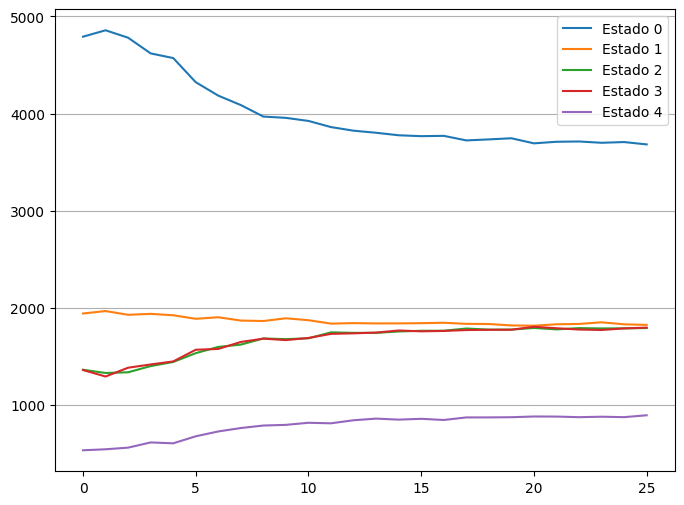

In [204]:
# gerando os diferentes pares lambda,mu
pares = [(1,1.5)]
for i in range(25):
    lamb, mu = pares[-1]
    pares.append((lamb+i/10,mu+i/10))

# tempo maximo:
t_final = 10000

# guarda os tempos de cada maquina:
tempos_tot = [[],[],[],[],[]]

# testando para todos os pares de lambda e mu:
for lamb, mu in pares:
    """
        estado 0 todas funcionando
        estado 1 maq1 quebra, maq2 funcionando
        estado 2 maq1 quebrou primeiro e maq2 logo em seguida ((todas quebradas))
        estado 3 maq2 quebr, maq 1 funcionando
        estado 4 maq2 quebrou primeiro e maq1 logo em seguida ((todas quebradas))
    """
    transition_rates = ([0,  lamb, 0,    0,  0   ],
                        [mu, 0,    lamb, 0,  0   ],
                        [0,  0,    0,    mu, 0   ],
                        [mu, 0,    0,    0,  lamb],
                        [0,  0,    mu,    0,  0   ])

    estado = 0
    tempo_estados = [0,0,0,0,0]

    while sum(tempo_estados) < t_final:
        tempos = []
        for tr in transition_rates[estado]:
            if(tr == 0):
                tempos.append(float('inf'))
            else:
                tempos.append(np.random.exponential(1/tr))
                tempo_estados[estado] += min(tempos)
                estado = tempos.index(min(tempos))
    
    for i in range(len(tempos_tot)):
        tempos_tot[i].append(tempo_estados[i])

plt.figure(figsize=(8, 6))
for index,i in enumerate(tempos_tot):
    plt.plot(i, label = 'Estado ' + str(index))
plt.grid(axis='y')
plt.legend()
plt.show()


3) Considere o exercício do Spa (exercício 5, slides de aula de cadeia de Markov Contínua).

a) Considerando μ1 = μ2 = 1, simule o problema e plote o gráfico do número médio de
pessoas no sistema (L) pela taxa de chegada (λ).

b) Fixando a taxa de chegada em λ = 0.8, simule o problema e plote o gráfico do número
médio de pessoas no sistema (L) e o tempo de espera (W) pelo tamanho permitido da
fila de espera (E). Considere que segundo o enunciado original, a fila de espera do Spa
tem tamanho 0, mas que agora é possível que haja pessoas no Spa aguardando
serviço.

4) Considere uma fila de banco M/M/1 com taxa de chegada λ = 1 e taxa de serviço μ = 1.2.
Considere ainda que cada cliente que chega tem uma probabilidade P de ser um cliente
Preferencial, e que o cliente preferencial passa na frente de todos os clientes regulares.

a) Simule e plote o gráfico do tempo médio de espera W por alguns valores de P (inclua
P=0).

b) Simule e plote um boxplot (também chamado de box & whisker plot) do tempo de
espera por alguns valores de P (inclua P=0).

5) Compare o tempo de espera (W) de 2 filas M/M/1 independentes com taxa de chegada λ = 1
cada uma e de 1 fila única M/M/2 com taxa de chegada λ = 2. Calcule o tempo médio que um
atendente fica ocioso em cada caso. Assuma a mesma taxa de serviço para todos os
atendentes.

6) Considere a rede de filas M/M/1 da figura abaixo, representando um trecho de avenidas de
uma grande cidade, com cada fila representando um cruzamento congestionado. Considere os
valores: λ1 = 10, λ2 = 14, μA = 15, μB = 30, μC = 24, μD = 20, μE = 6 (dados em veículos por
minuto). A prefeitura deseja realizar obras para melhorar o fluxo de veículos em um dos 5
cruzamentos (isto é, aumentar a taxa de serviço), visando reduzir o tempo médio de espera
(W) na rede. Mostre por simulação e discuta qual o cruzamento seria o melhor candidato para
a melhoria.